**Having a good understanding of how things work** can help you 
* quickly home in on the appropriate model, 
* the right training algorithm to use, and 
* a good set of hyperparameters for your task. 

**Understanding what’s under the hood** will also help you 
* debug issues and 
* perform error analysis more efficiently. 

Lastly, **most of the topics discussed in this chapter will be essential** in 
* understanding, 
* building, and 
* training 

**neural networks** (discussed in Part II of this book).

In this chapter we will start by looking at 
**the Linear Regression model**, one of the simplest models there is. 

We will discuss **two very different ways to train it**:

* Using a **direct “closed-form” equation** that *directly computes the model parameters* that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set).

* Using an **iterative optimization approach** called ***Gradient Descent (GD)*** that 
   * gradually tweaks the model parameters to *minimize the cost function* over the training set, 
   * eventually converging to the same set of parameters as the first method. 
   
We will look at **a few variants of Gradient Descent** that we will use again and again when we study neural networks in Part II: **Batch GD, Mini-batch GD, and Stochastic GD**.

Next we will look at **Polynomial Regression**, a more complex model that can fit *nonlinear datasets*. 
Since this model has **more parameters** than Linear Regression, it is **more prone to overfitting** the training data, so we will look at how to detect whether or not this is the case using *learning curves*, and then we will look at several **regularization techniques** that can reduce the risk of overfitting the training set.

Finally, we will look at two more models that are commonly used for *classification tasks*: **Logistic Regression** and **Softmax Regression**.

> ## WARNING
>
> There will be **quite a few math equations** in this chapter, using basic notions of linear algebra and calculus. 
> To understand these equations, you will need to know what 
> * vectors and 
> * matrices are; 
> * how to transpose them, 
> * multiply them (dot and cross), and 
> * inverse them; and 
> * what partial derivatives are. 
>
> If you are unfamiliar with these concepts, please go through the linear algebra and calculus introductory tutorials available as Jupyter notebooks in **the online supplemental material**. 
> For those who are truly allergic to mathematics, you should still go through this chapter and simply skip the equations; hopefully, the text will be sufficient to help you understand most of the concepts.

# Linear Regression

In Chapter 1 we looked at **a simple regression model** of life satisfaction:

$$
\text{life_satisfaction} = \theta_0 +\theta_1 \text{GDP_per_capita}
$$


This model is just **a linear function** of 
* the input feature $\text{GDP_per_capita}$. 
* $\theta_0$ and $\theta_1$ are the model’s **parameter**s.

More generally, a linear model makes a prediction by simply computing **a weighted sum of the input features**, plus a *constant called the* **bias term** (also called the **intercept term**), as shown in Equation 4-1.

### Equation 4-1. Linear Regression model prediction

$$
\hat{y}=\theta_0+\theta_1x_1+\theta_2x_2+\cdots +\theta_n x_n \tag{4-1}
$$

In this equation:

* $\hat{y}$ is the predicted value.
* $n$ is the number of features.
* $x_i$ is the $i^{th}$ feature value.
* $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1$, $\theta_2$, ⋯, $\theta_n$).

This can be written much more concisely using a **vectorized form**, as shown in Equation 4-2.

### Equation 4-2. Linear Regression model prediction (vectorized form)

$$
\hat{\textbf{y}}=h_\boldsymbol{\theta}(\textbf{x})=\boldsymbol{\theta}\cdot\textbf{x}
$$

In this equation:

* $\boldsymbol{\theta}$ is the model’s **parameter vector**, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.
* $\textbf{x}$ is the instance’s **feature vector**, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
* $\boldsymbol{\theta} \cdot \textbf{x}$ is the **dot product** of the vectors $\boldsymbol{\theta}$ and $\textbf{x}$, which is of course equal to $\theta_0x_0+ \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$.
* $h_\boldsymbol{\theta}$ is the **hypothesis function**, using the model parameters $\boldsymbol{\theta}$.

> ## Note
>
> In Machine Learning, vectors are often represented as **column vectors**, which are 2D arrays with a single column. 
> If $\boldsymbol{\theta}$ and $\textbf{x}$ are column vectors, then 
> * the prediction is $\hat{\textbf{y}}=\boldsymbol{\theta}^T\textbf{x}$, where 
> * $\boldsymbol{\theta}^T$ is the transpose of $\boldsymbol{\theta}$ (a row vector instead of a column vector) and 
> * $\boldsymbol{\theta}^T\textbf{x}$ is the matrix multiplication of $\boldsymbol{\theta}^T$ and $\textbf{x}$. 
>
> It is of course the same prediction, except that it is now represented as a single-cell matrix rather than a scalar value. In this book I will use this notation to avoid switching between dot products and matrix multiplications.

## how do we train it 

**Training a model** means **setting its parameters so that the model best fits the training set**. 

For this purpose, we first need **a measure of how well (or poorly) the model fits the training data**. 

In Chapter 2 we saw that **the most common performance measure of a regression model** is 
* the Root Mean Square Error (RMSE) (Equation 2-1). 

Therefore, to train a Linear Regression model, we need to **find the value of $\boldsymbol{\theta}$ that minimizes the RMSE**. 

In practice, it is simpler to minimize the **mean squared error (MSE)** than the **RMSE**, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

The MSE of a Linear Regression hypothesis $h_\boldsymbol{\theta}$ on a training set $\textbf{X}$ is calculated using Equation 4-3.

### Equation 4-3. MSE cost function for a Linear Regression model

$$
\textbf{MSE}(\textbf{X},h_\boldsymbol{\theta})=\frac{1}{M}\sum^{m}_{i=1}\left(\boldsymbol{\theta}^T\textbf{x}^{(i)}-y^{(i)}\right)^2
$$

Most of these notations were presented in Chapter 2 (see “Notations”). The only difference is that we write $h_\boldsymbol{\theta}$ instead of just $h$ to make it clear that the model is parametrized by the vector $\boldsymbol{\theta}$. To simplify notations, we will just write $\textbf{MSE}(\boldsymbol{\theta})$ instead of $\textbf{MSE}(\textbf{X},h_\boldsymbol{\theta})$.


## The Normal Equation

To find the value of $\boldsymbol{\theta}$ that minimizes the cost function, there is a **closed-form solution**—in other words, **a mathematical equation that gives the result directly**. This is called the **Normal Equation** (Equation 4-4).

### Equation 4-4 Normal Equation

$$
\hat{\boldsymbol{\theta}}=(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T \textbf{y}
$$

In this equation:

* $\hat{\boldsymbol{\theta}}$ is the value of $\boldsymbol{\theta}$ that minimizes the cost function. It means that $\hat{\boldsymbol{\theta}}$ is the estimated value.
* $\textbf{y}$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.

Let’s generate some linear-looking data to test this equation on (Figure 4-1):



In [ ]:
import numpy as np
np.random.seed(42)

X = 2 * np.random.rand(100,1)
print(X.shape)

y = 4+3*X + np.random.randn(100,1)
print(y.shape)

(100, 1)
(100, 1)


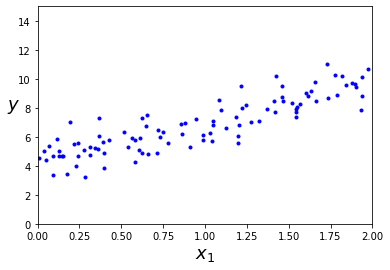

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X,y, "b.")
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

Now let’s compute $\hat{\boldsymbol{\theta}}$ using the **Normal Equation**. We will use the 
* `inv()` function from `NumPy`’s linear algebra module (`np.linalg`) to compute the inverse of a matrix, and 
* the `dot()` method for matrix multiplication:

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #위에 식을 그대로 적은 것

The function that we used to generate the data is $y = 4 + 3x_1 + \text{Gaussian noise}$. Let’s see what the equation found:

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

Now we can make predictions using $\hat{\boldsymbol{\theta}}$ 

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [ ]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Let’s plot this model’s predictions (Figure 4-2):


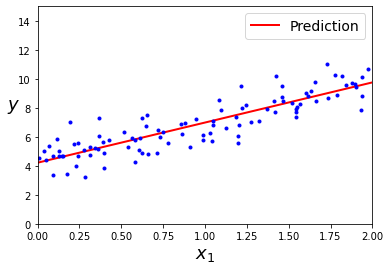

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", linewidth=2, label='Prediction')
plt.plot(X, y, "b.")
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.legend(loc='best', fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Performing **Linear Regression** using **Scikit-Learn** is simple:

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.21509616] [[2.77011339]]


array([[4.21509616],
       [9.75532293]])

The **LinearRegression** class is based on the `scipy.linalg.lstsq()` function (the name stands for “**least squares**”), which you could call directly:

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) #cut-off ratio for for singular value
print(rank, s)
theta_best_svd

2 [14.37020392  4.11961067]


array([[4.21509616],
       [2.77011339]])

This function computes $\hat{\boldsymbol{\theta}}=\textbf{X}^+\textbf{y}$, where $\textbf{X}^+$ is the pseudoinverse of $\textbf{X}^+$ (specifically, the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

The **pseudoinverse** itself is computed using a standard matrix factorization technique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix $\textbf{X}$ into the matrix multiplication of three matrices $\textbf{U}\boldsymbol{\Sigma}\textbf{V}^T$ (see `numpy.linalg.svd()`). 

The **pseudoinverse** is computed as $\textbf{X}^+=\textbf{V}\boldsymbol{\Sigma}^+\textbf{U}^T$. 
To compute the matrix $\boldsymbol{\Sigma}^+$, the algorithm takes $\boldsymbol{\Sigma}$ and sets to zero all values smaller than a **tiny threshold value**, then it replaces *all the nonzero values with their inverse*, and finally it transposes the resulting matrix. 

This approach**(SVD)** is **more efficient** than computing the Normal Equation, plus *it handles edge cases nicely*: indeed, 
* **the Normal Equation may not work** 
   * if the **matrix $\textbf{X}^T\textbf{X}$ is not invertible (i.e., singular)**, such as if $m < n$ (sample수가 feature수보다 적음) or 
   * if **some features are redundant**, 
* but the **pseudoinverse** is always defined.

## Computational Complexity

The **Normal Equation computes** the inverse of $\textbf{X}^T\textbf{X}$, which is an $(n + 1) \times (n + 1)$ matrix (where $n$ is the number of features). 
* The **computational complexity of inverting** such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$, depending on the implementation. 
* In other words, if you double the number of features, you multiply the computation time by roughly $2^{2.4} = 5.3$ to $2^3 = 8$.

The **SVD approach** used by Scikit-Learn’s **LinearRegression** class is about $O(n^2)$. 
* If you double the number of features, you multiply the computation time by roughly 4.

> ### WARNING
>
> Both the **Normal Equation** and the **SVD** approach get **very slow** when **the number of features grows large (e.g., 100,000)**.  SVD는 짤라내는게 많아서 정확하진 않은데 이게 더 괜찮다. (0.00001 같은 건 0으로 없애버리는 등)
>
>On the positive side, *both are linear with regard to **the number of instances** in the training set* (they are O(m)), so they handle large training sets efficiently, provided they can fit in memory.



# Gradient Descent

**Gradient Descent is a generic optimization algorithm** capable of finding optimal solutions to a **wide range of problems**. 

> The general idea of Gradient Descent is to
> *  **tweak parameters iteratively** 
> * in order **to minimize a cost function**.

Suppose you are lost in the mountains in a dense fog, and you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: 
* it measures **the local gradient of the error function** with regard to the parameter vector $\boldsymbol{\theta}$, and 
* it goes in the direction of descending gradient. 
* Once the gradient is zero, you have reached a minimum!

Concretely, you start by 
1. filling $\boldsymbol{\theta}$ with random values (this is called **random initialization**). 
2. Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), 
3. until the algorithm converges to a minimum (see Figure 4-3).

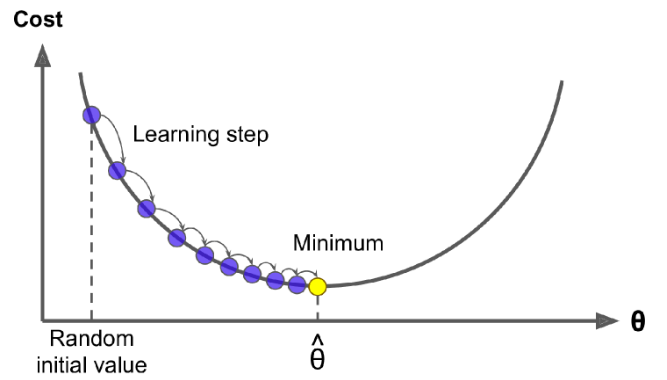

### Figure 4-3. 

In this depiction of Gradient Descent, the model parameters are initialized randomly and get tweaked repeatedly to minimize the cost function; the learning step size is proportional to the slope of the cost function, so the steps gradually get smaller as the parameters approach the minimum

An important parameter in Gradient Descent is **the size of the steps**, determined by the **learning rate** *hyperparameter*. 

If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time (see Figure 4-4).

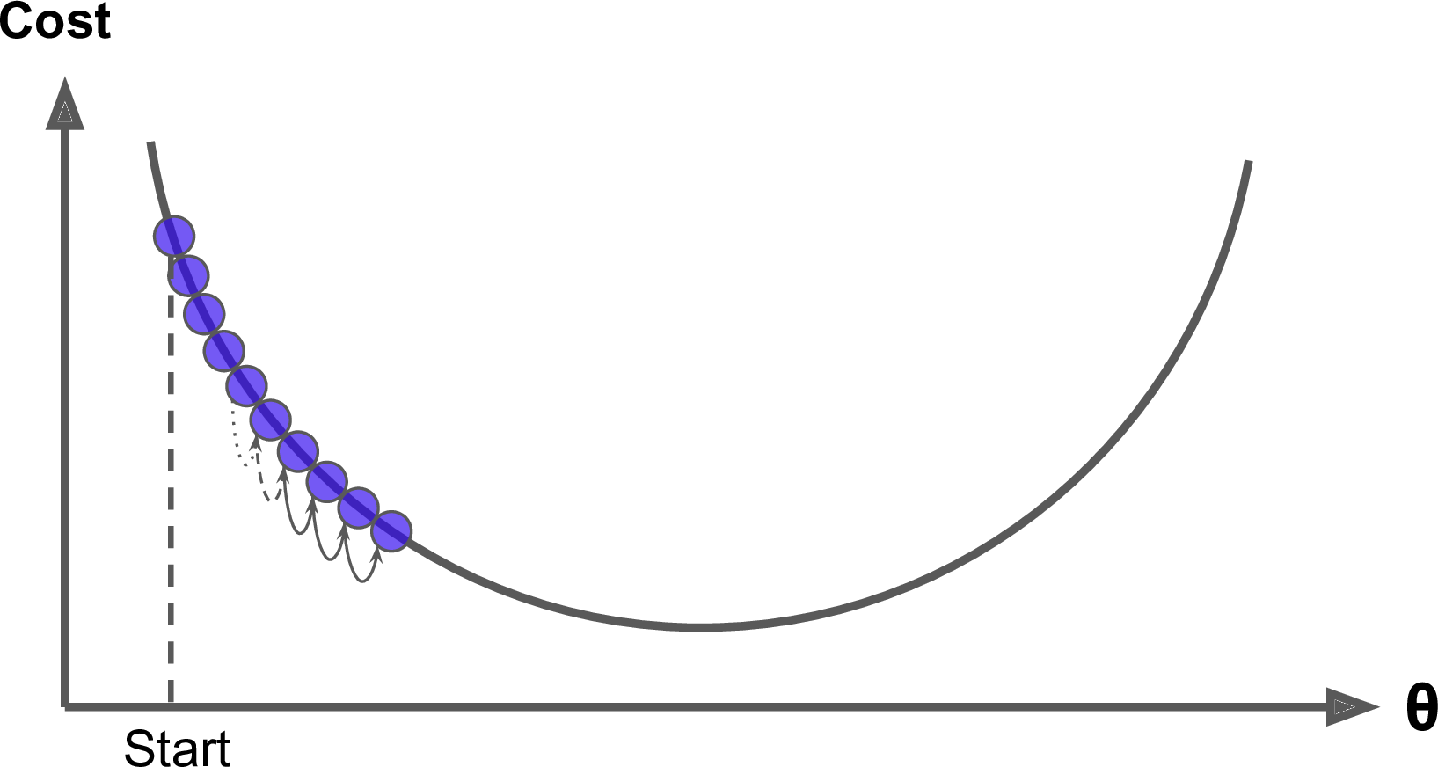

### Figure 4-4. 

The learning rate is too small



On the other hand, **if the learning rate is too high**, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution (see Figure 4-5).

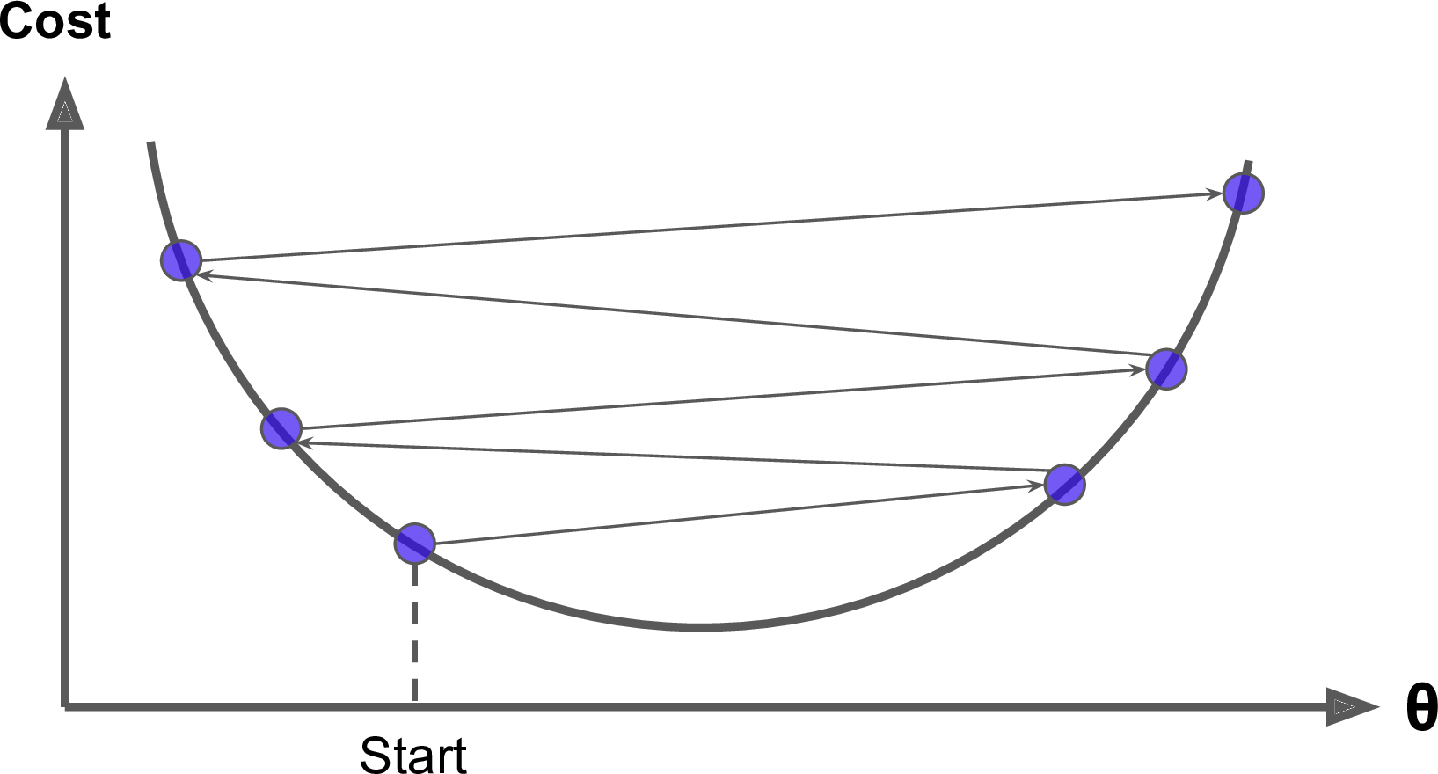

### Figure 4-5. 

The learning rate is too large

Finally, not all cost functions look like nice, **regular bowls**. 

There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum difficult. 

Figure 4-6 shows the two main challenges with Gradient Descent. 

If the random initialization starts the algorithm on the left, then it will converge to a **local minimum**, which is not as good as the **global minimum**. 

If it starts on the right, then it will take a very long time to cross the **plateau**. And if you stop too early, you will never reach the global minimum.

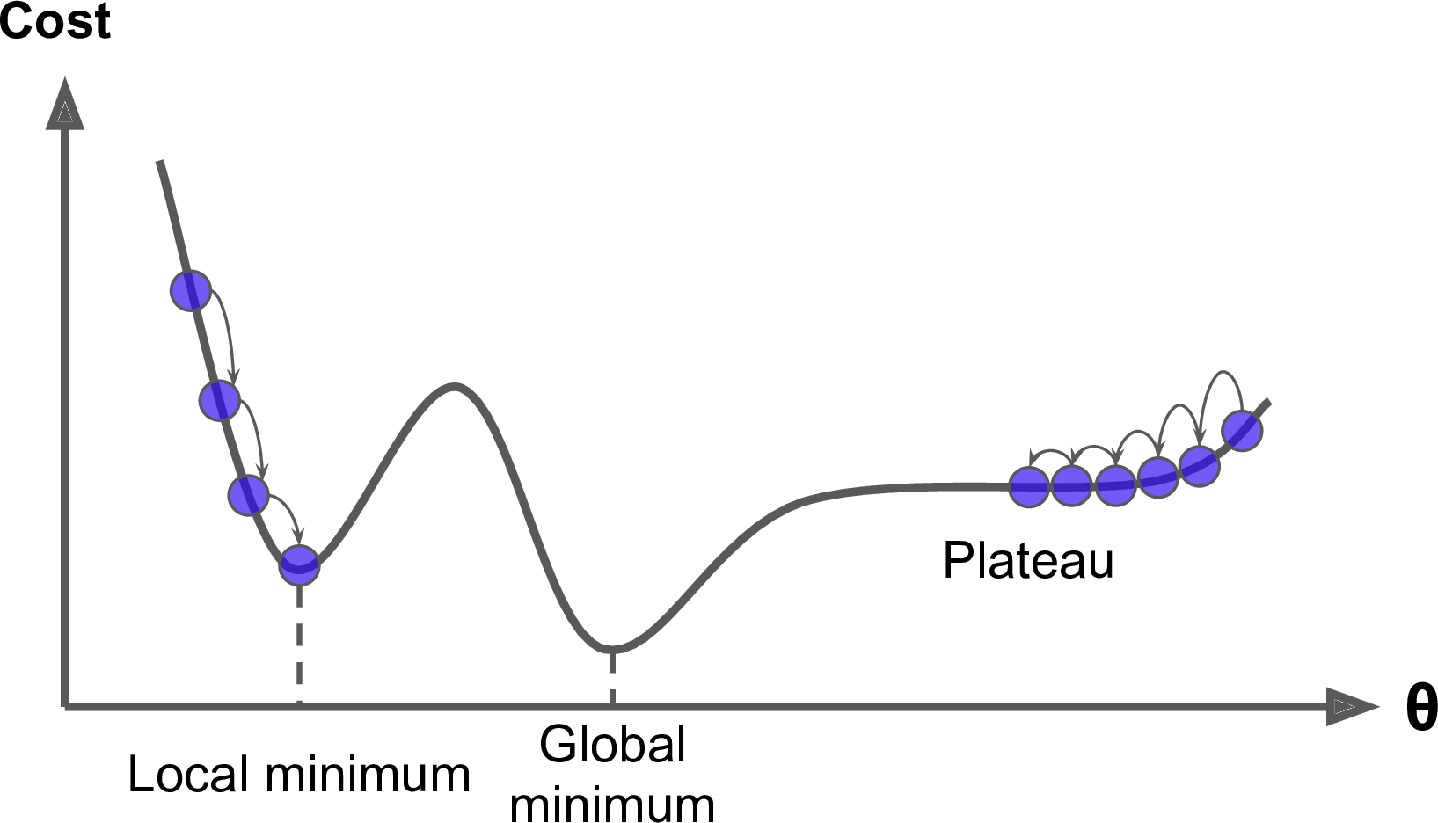

### Figure 4-6. 

Gradient Descent pitfalls

Fortunately, the **MSE cost function for a Linear Regression model** happens to be **a convex function**, which means that 
* if you pick any two points on the curve, 
* the line segment joining them never crosses the curve. 

This implies that **there are no local minima**, **just one global minimum**. It is also a **continuous function with a slope that never changes abruptly**.

 These two facts have a great consequence: 
 **Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high)**.

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. Figure 4-7 shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

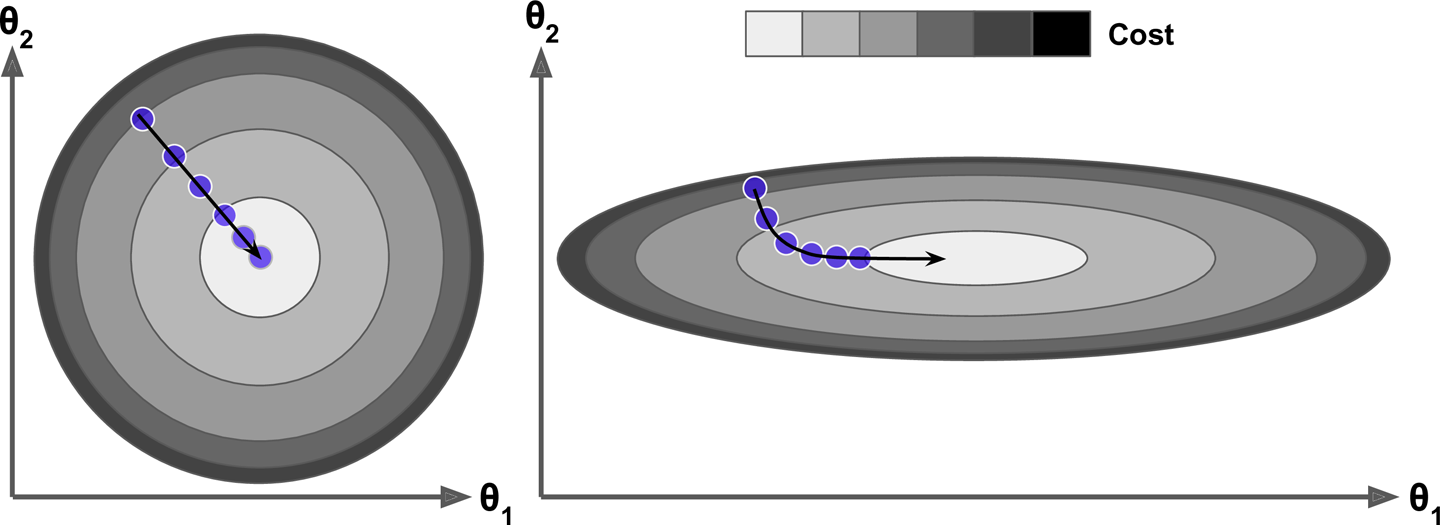

### Figure 4-7. 

Gradient Descent with (left) and without (right) feature scaling

As you can see, on the left the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.

> ### WARNING
>
> When using Gradient Descent, you should ensure that **all features have a similar scale** (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

This diagram also illustrates the fact that **training a model** means **searching for a combination of model parameters that minimizes a cost function (over the training set)**. 

* It is a search in the model’s parameter space: 
   * the more parameters a model has, 
   * the more dimensions this space has, and 
   * the harder the search is: 
      * searching for a needle in a 300-dimensional haystack is much trickier than in 3 dimensions. 
      
Fortunately, since **the cost function is convex in the case of Linear Regression**, the needle is simply at the bottom of the bowl.

### Batch Gradient Descent

To implement **Gradient Descent**, you need to compute **the gradient of the cost function** with regard to *each model parameter $\theta_j$*. 
* In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit. 
* This is called a **partial derivative**. 

It is like asking “What is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions). 

Equation 4-5 computes the partial derivative of the cost function with regard to parameter $\theta_j$, noted  $\frac{\partial \text{MSE}(\boldsymbol{\theta})}{\partial \theta_j}$.

### Equation 4-5. Partial derivatives of the cost function

$$
\frac{\partial }{\partial \theta_j}\text{MSE}(\boldsymbol{\theta})=\frac{2}{m}\sum^m _{i=1}\left( \boldsymbol{\theta}^T \textbf{x}^{(i)}-y^{(i)}x_j^{(i)} \right)
$$

Instead of computing these partial derivatives individually, you can use Equation 4-6 to compute them all in one go. The **gradient vector**, noted $\nabla_\boldsymbol{\theta}\text{MSE}(\boldsymbol{\theta})$, contains all the partial derivatives of the cost function (one for each model parameter).

### Equation 4-6. Gradient vector of the cost function

$$
\nabla_\boldsymbol{\theta}\text{MSE}(\boldsymbol{\theta})= \left( \begin{matrix}
\frac{\partial}{\partial \theta_0} \text{MSE}(\boldsymbol{\theta}) \\
\frac{\partial}{\partial \theta_1} \text{MSE}(\boldsymbol{\theta}) \\
\vdots
\frac{\partial}{\partial \theta_n} \text{MSE}(\boldsymbol{\theta}) 
\end{matrix}
\right) = \frac{2}{m}\textbf{X}^T(\textbf{X}\boldsymbol{\theta}-\textbf{y})
$$

> ### WARNING
> Notice that **this formula involves calculations over the full training set** $\textbf{X}$, at each Gradient Descent step! 
>
> This is why the algorithm is called **Batch Gradient Descent**: it uses the whole batch of training data at every step (actually, **Full Gradient Descent** would probably be a better name). As a result it is **terribly slow** on very large training sets (but we will see much faster Gradient Descent algorithms shortly). 
> However, **Gradient Descent scales well with the number of features**; 
>
> * training a Linear Regression model when there are **hundreds of thousands of features** is
>    * **much faster using Gradient Descent** 
>    * than using the **Normal Equation** or **SVD** decomposition.
>
> feature가 많은 경우, GD가 유리!


Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $\nabla_\boldsymbol{\theta}\text{MSE}(\boldsymbol{\theta})$ from $\boldsymbol{\theta}$. 

* **This is where the learning rate $\eta$ comes into play: 
* multiply the gradient vector by $\eta$ to determine the size of the downhill step (Equation 4-7).

### Equation 4-7. Gradient Descent step

$$
\boldsymbol{\theta}^{(\text{next step})}=\boldsymbol{\theta}-\eta\nabla_\boldsymbol{\theta}\text{MSE}(\boldsymbol{\theta})
$$

Let’s look at a quick implementation of this algorithm:


In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

That wasn’t too hard! 

Let’s look at the resulting theta:



In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

Hey, that’s exactly what the Normal Equation found! Gradient Descent worked perfectly. But what if you had used a different learning rate eta? Figure 4-8 shows the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point).

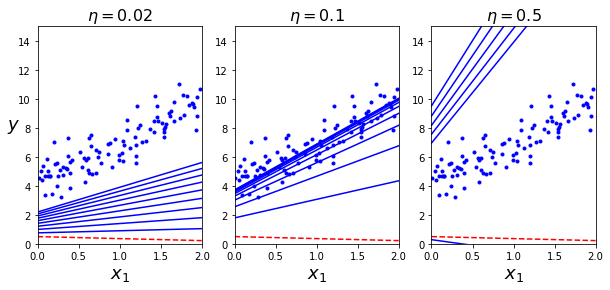

In [ ]:
def plot_gradient_descent(theta, eta, theta_path=None):

  m = len(X_b)
  plt.plot(X,y, "b.")
  n_iter = 1000

  for i in range(n_iter):
    if i < 10:
      y_predict = X_new_b.dot(theta)
      style= 'b-' if i > 0 else 'r--' #start > red!
      plt.plot(X_new,y_predict,style)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - gradients *eta
    if theta_path is not None:
      theta_path.append(theta)
  plt.xlabel('$x_1$', fontsize=18)
  plt.axis([0,2,0,15])
  plt.title('$\eta= {}$'.format(eta), fontsize=16)


np.random.seed(42)
theta = np.random.randn(2,1) # randominitialization

theta_path_bgd = []

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$',fontsize=18, rotation=0)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path = theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

plt.show()





On the left, **the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time**. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, **the learning rate is too high: the algorithm diverges**, jumping all over the place and actually getting further and further away from the solution at every step.

**To find a good learning rate, you can use grid search** (see Chapter 2). However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

You may wonder **how to set the number of iterations**. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore. **A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny**—that is, when its norm becomes smaller than a tiny number $\epsilon$ (called the **tolerance**)—because this happens when Gradient Descent has (almost) reached the minimum.

> ### CONVERGENCE RATE (당연한 애기... )
>
> When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take O(1/ϵ) iterations to reach the optimum within a range of ϵ, depending on the shape of the cost function. If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses **the whole training set to compute the gradients at every step**, which makes it very slow when the training set is large. 

*At the opposite extreme*, **Stochastic Gradient Descent** picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

Obviously, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (Stochastic GD can be implemented as an **out-of-core algorithm**; see Chapter 1).

On the other hand, due to its **stochastic (i.e., random) nature**, this algorithm is **much less regular than Batch Gradient Descent**: 
* instead of gently decreasing until it reaches the minimum, 
* the cost function will **bounce up and down**, 
* decreasing only on average. 

Over time it will end up **very close to the minimum, but once it gets there it will continue to bounce around, never settling down** (see Figure 4-9). 

So once the algorithm stops, the final parameter values are good, but not optimal.

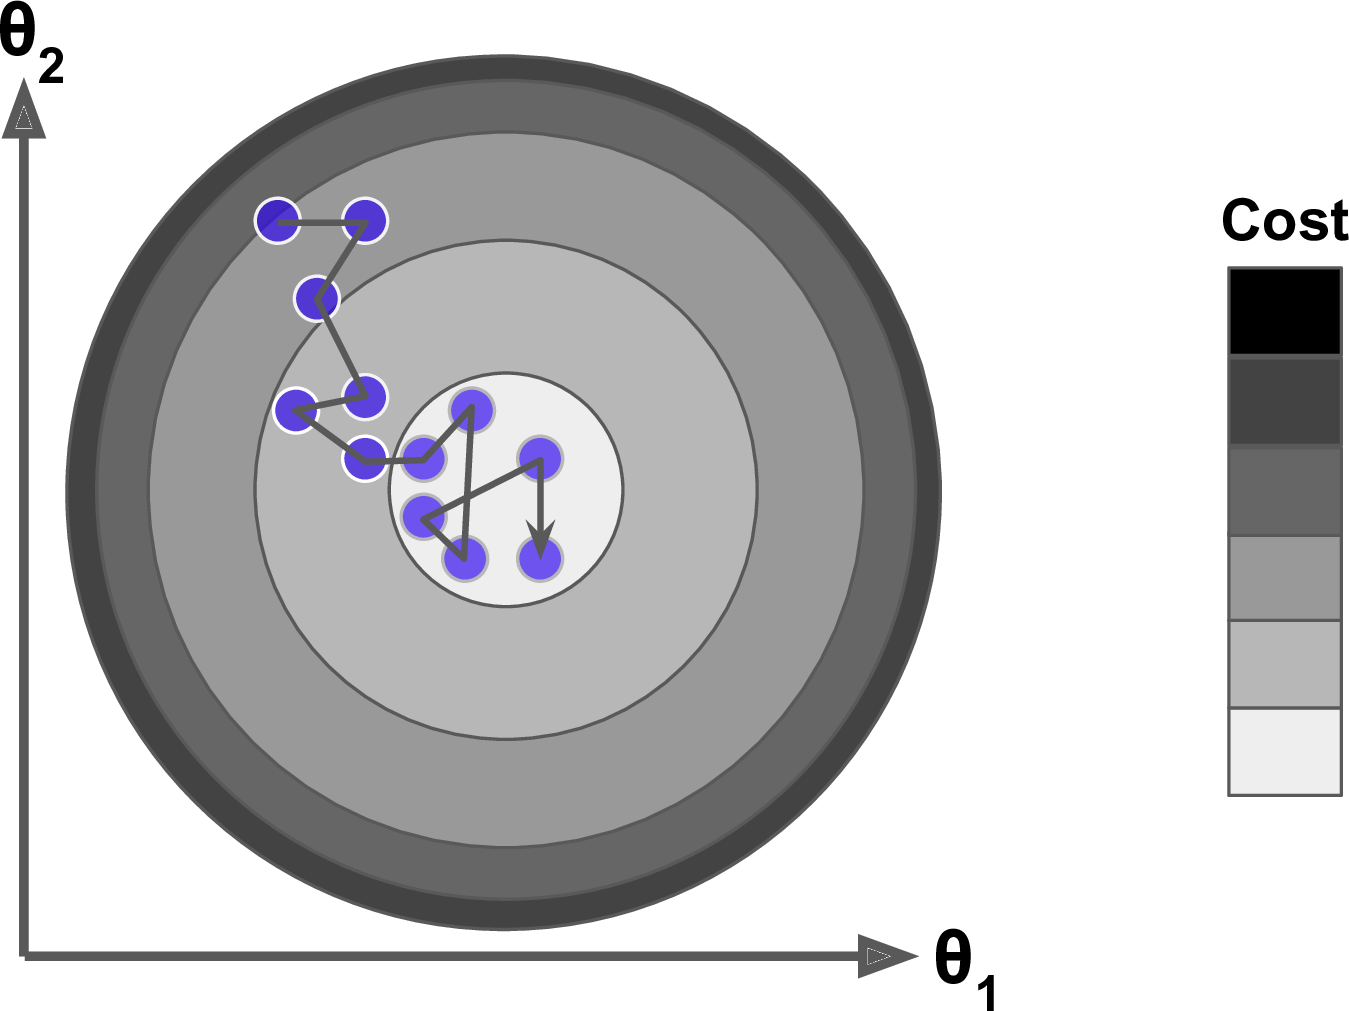

### Figure 4-9. 

With Stochastic Gradient Descent, each training step is much faster but also much more stochastic than when using Batch Gradient Descent

When the cost function is very irregular (as in Figure 4-6), this can actually help the algorithm jump out of **local minima**, so **Stochastic Gradient Descent** has **a better chance** of finding the global minimum than Batch Gradient Descent does.

Therefore, **randomness is good to escape from local optima**, but bad because it means that the algorithm can **never settle at the minimum**. 

One solution to this dilemma is to **gradually reduce the learning rate**. 
* The steps start out large (which helps make quick progress and escape local minima), 
* then get smaller and smaller, 
* allowing the algorithm to settle at the global minimum. 

This process is akin to **simulated annealing**, an algorithm inspired from the process in **metallurgy of annealing(금속가열 냉각. 불에 달군 후 천천히 냉각시켜 담금질)**, where *molten metal is slowly cooled down*. 

The function that determines the learning rate at each iteration is called the **learning schedule**. 
* If the learning rate is reduced too quickly, you may get stuck in a **local minimum**, or even end up frozen halfway to the minimum. 
* If the learning rate is reduced too slowly, you **may jump around the minimum** for a long time and end up with a **suboptimal solution** if you halt training too early.

This code implements Stochastic Gradient Descent using a simple learning schedule:

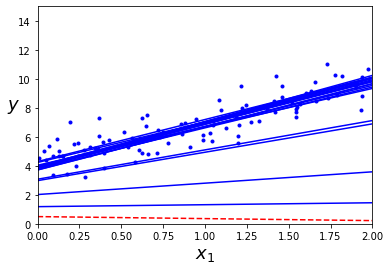

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:                    # not shown in the book
      y_predict = X_new_b.dot(theta)           # not shown
      style = "b-" if i > 0 else "r--"         # not shown
      plt.plot(X_new, y_predict, style)        # not shown

    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

    theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

By convention we iterate by rounds of $m$ iterations; 
* each round is called an **epoch**. 

While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes *through the training set* only **50 times** and reaches a pretty good solution:

In [ ]:
theta

array([[4.2051137 ],
       [2.81837201]])

Figure 4-10 shows the first 20 steps of training (notice how irregular the steps are).

Note that since instances are picked randomly, 
* **some instances may be picked several times per epoch**, 
* while **others** may not be picked at all. 

If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to 
* **shuffle the training set (making sure to shuffle the input features and the labels jointly)**, 
* then go through it instance by instance, 
* then shuffle it again, 
* and so on. 

However, this approach generally converges more slowly.

> 실제로 scikit learn의 SGDClassifier와 SGDRegressor가 사용하는 방식.


> ### WARNING
> When using Stochastic Gradient Descent, 
> * the training instances must be independent and
> * identically distributed (IID) 
> 
> to ensure that the parameters get pulled toward the global optimum, on average. 
> 
> A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not shuffle the instances—for example, if the instances are sorted by label—then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

To perform Linear Regression using Stochastic GD with Scikit-Learn, you can use the **SGDRegressor** class, which defaults to optimizing the **squared error cost function**. 

The following code runs for maximum $1,000$ epochs or until the loss drops by less than $0.001$ during one epoch (`max_iter=1000`, `tol=1e-3`). 
* It starts with a learning rate of 0.1 (`eta0=0.1`), using the default learning schedule (different from the preceding one). 
* Lastly, it does not use any regularization (`penalty=None`; more details on this shortly):

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Once again, you find a solution 
quite close to the one returned by the Normal Equation:


In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.17272445]), array([2.8601553]))

### Mini-batch Gradient Descent
The last Gradient Descent algorithm we will look at is called **Mini-batch Gradient Descent**. 

It is simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

The algorithm’s progress in parameter space is less erratic than with Stochastic GD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than Stochastic GD—but it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Linear Regression). Figure 4-11 shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

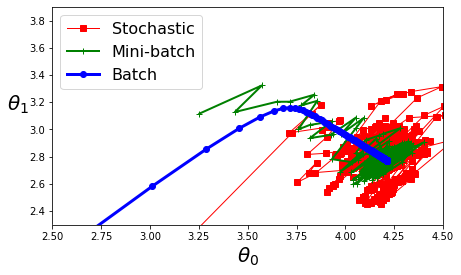

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Let’s compare the algorithms we’ve discussed so far for Linear Regression6 (recall that m is the number of training instances and n is the number of features); see Table 4-1.

### Table 4-1. Comparison of algorithms for Linear Regression

| Algorithm	| Large $m$ |	Out-of-core support |	Large $n$ |	Hyperparams	 | Scaling required |Scikit-Learn |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Normal Equation | Fast | No | Slow | 0 | No |N/A|
| SVD | Fast | No | Slow | 0 | No |LinearRegression|
| Batch GD | Slow | No | Fast | 2 | Yes |SGDRegressor|
| Stochastic GD | Fast | Yes | Fast | $\ge2$ | Yes |SGDRegressor|
| Mini-batch GD | Fast | Yes | Fast | $\ge2$ | Yes |SGDRegressor|

> ### NOTE
>
> There is almost no difference after training: all these algorithms end up with **very similar models** and make predictions in **exactly the same way**.